# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

random.seed(10)

# Load Data and Preprocessing

In [2]:
# Dataset is already loaded below
os.chdir('D:\\Career\\\DS-ML\\ash_tree\\')
df = pd.read_csv("Compounds_for_Tian.csv")
dat=df.iloc[:,9:204].drop(3).reset_index().transpose().iloc[1:,:]
dat.iloc[:,3:]=dat.iloc[:,3:].astype(float)
smy=df.iloc[3:,0:9]
names=['family','year','infest_level']+[i+1 for i in range(312)]
dat.columns = names
(dat.head())

,family,year,infest_level,1,2,3,4,5,6,7,...,303,304,305,306,307,308,309,310,311,312
1,C,2018,Uninfested,190.750245,472.180854,1547.148264,189.768413,38.256485,458.590228,13.277872,...,32.884819,0.0,0.0,0.0,0.0,0.0,71.465623,642.141079,74.998289,4271.14392
2,C,2018,Uninfested,205.092233,480.025856,1699.110781,166.762426,35.57719,428.683692,3.300284,...,87.580423,0.0,33.014736,122.427017,0.0,2.861174,211.122339,1246.689643,1.074715,10315.04749
3,C,2018,Uninfested,198.488664,364.734072,1208.282758,171.56697,42.906023,513.067172,15.240847,...,54.847208,0.0,0.0,71.927338,0.0,0.0,102.50883,784.492006,78.80647,6222.634886
4,C,2018,Uninfested,205.282883,723.263773,2045.086061,141.431346,27.370308,314.364792,7.610335,...,27.222003,0.0,6.104755,106.002083,1.940932,2.785245,182.506375,1219.676237,90.302976,9054.190361
5,C,2018,Uninfested,194.405033,267.565488,1710.778834,272.759061,69.83358,740.539732,18.367785,...,81.73244,0.0,11.161716,71.998542,0.0,0.0,147.783101,1043.399963,11.845275,7922.380446


In [3]:
#first check if there is any duplication 
print(('Number of duplications:',sum(dat.duplicated())))

#check missing data
missing=dat.isnull().sum()
print(('Number of missing entries:',sum(missing)))

('Number of duplications:', 0)
('Number of missing entries:', 0)


In [4]:
#normalize data
normalize=True
if normalize:
    co_names=list(dat.columns)
    co_names.remove('family')
    co_names.remove('year')
    co_names.remove('infest_level')
    dat_norm=dat
    dat_norm[co_names]=(dat[co_names]-dat[co_names].min())/(dat[co_names].max()-dat[co_names].min())
    (dat_norm.head())
else:
    dat_norm=dat
    

In [5]:
#One-hot encoding for categorical data
dat_norm=pd.get_dummies(dat_norm, columns=['family','year'])
dat_norm.head()

,infest_level,1,2,3,4,5,6,7,8,9,...,311,312,family_C,family_Replicated Control,family_Y,family_Z,year_2018,year_2019,year_2020,year_Replicated Control
1,Uninfested,0.390397,0.311602,0.41089,0.263053,0.160501,0.179614,0.118456,0.214362,0.121531,...,0.06085,0.175313,1,0,0,0,1,0,0,0
2,Uninfested,0.41975,0.317571,0.466333,0.231162,0.149261,0.167901,0.029443,0.178001,0.077559,...,0.000872,0.42339,1,0,0,0,1,0,0,0
3,Uninfested,0.406234,0.229849,0.287254,0.237822,0.180008,0.200951,0.135968,0.115563,0.103863,...,0.06394,0.255413,1,0,0,0,1,0,0,0
4,Uninfested,0.42014,0.502642,0.592563,0.196049,0.114829,0.123126,0.067894,0.317249,0.058268,...,0.073268,0.371637,1,0,0,0,1,0,0,0
5,Uninfested,0.397877,0.155917,0.47059,0.378092,0.29298,0.290044,0.163865,0.108718,0.133026,...,0.009611,0.325181,1,0,0,0,1,0,0,0


In [6]:
drop_rep=True

if drop_rep:
    train, test = train_test_split(dat_norm.iloc[0:184,:], test_size=0.2)
    y_train=np.array(train.iloc[:,0])
    X_train=np.array(train.iloc[:,1:])

    y_test=np.array(test.iloc[:,0])
    X_test=np.array(test.iloc[:,1:])

    fea=list(dat_norm.columns)
else:
    train, test = train_test_split(dat_norm, test_size=0.2)
    y_train=np.array(train.iloc[:,0])
    X_train=np.array(train.iloc[:,1:])

    y_test=np.array(test.iloc[:,0])
    X_test=np.array(train.iloc[:,1:])

    fea=list(dat_norm.columns)

# Random Forest Fitting

In [7]:
rf=RandomForestClassifier(n_estimators=50,max_depth=20,random_state=10)
cv=KFold(n_splits=20,shuffle=True,random_state=1)
res=cross_val_score(rf,X_train,y_train,cv=cv,scoring='accuracy')
print(('Validation accuracy:',np.mean(res)))

('Validation accuracy:', 0.6133928571428571)


In [8]:
#After make sure the model is good, we preceed to do training and prediction
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
prob=rf.predict_proba(X_test)
acc=[pred[i]==y_test[i] for i in range(len(pred))]
print(('Testing accuracy:',metrics.accuracy_score(y_test, pred)))

('Testing accuracy:', 0.6756756756756757)


# Feature Importance

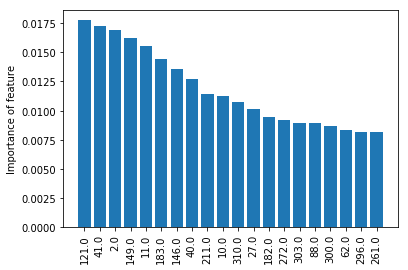

In [19]:
#this is the feature importance
imp=list(rf.feature_importances_)
fea_im=[(feature, importance) for feature, importance in zip(fea[1:],imp)]
fea_im=sorted(fea_im,key=lambda x:x[1],reverse=True)[0:20]
#print(list(fea_im[0:20]))

xx=list(range(len(fea_im)))
#fea_im.reverse()\



````
plt.bar(xx,np.array(fea_im)[:,1],orientation='vertical')
plt.xticks(xx,np.array(fea_im)[:,0],rotation='vertical')
plt.ylabel('Importance of feature')

plt.savefig('Feature_importance.png',bbox_inches='tight',pad_inches=0.15)

# SVM

In [10]:
clf = svm.SVC(kernel='rbf') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Testing accuracy:",metrics.accuracy_score(y_test, y_pred))

Testing accuracy: 0.5675675675675675
